# Step 1: Setup

In [1]:
import tensorflow as tf


In [2]:
print(tf.__version__)

2.11.0


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Step 2: Data Preprocessing

In [4]:
# import the dataset
from tensorflow.keras.datasets import fashion_mnist

In [5]:
# load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [7]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [8]:
np.max(x_train), np.min(x_train)

(255, 0)

In [9]:
np.max(y_train), np.min(y_train)

(9, 0)

In [11]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


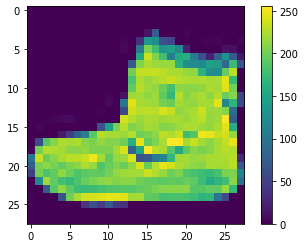

In [22]:
# Data Exploration
plt.figure()
plt.imshow(x_train[0])
# Tala ko 0-255 dekauxa right side ma
plt.colorbar()

In [23]:
y_train[0],class_names[9]

(9, 'Ankle boot')

In [24]:
# Normalizing the data
x_train = x_train/255.0
x_test = x_test/255.0



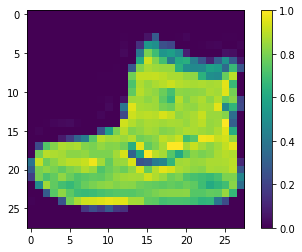

In [26]:
# Data Exploration
plt.figure()
plt.imshow(x_train[0])
# Tala ko 0-255 dekauxa right side ma
plt.colorbar()
# Normalizing the data range 0-1 ma aauxa

In [28]:
# Flatten the data means 2D Array to 1D Array
x_train.shape, x_test.shape


((60000, 28, 28), (10000, 28, 28))

In [29]:
# (28, 28) yo 2D array lai 1d array ma convert gareko
x_train = x_train.reshape(len(x_train), 28*28)
x_test = x_test.reshape(len(x_test), 28*28)

# Arko tarika 1D array banauna
#x_train = x_train.reshape(-1, 28*28)
#x_test = x_test.reshape(-1, 28*28)




In [30]:
x_train.shape, x_test.shape

((60000, 784), (10000, 784))

## Building the model

In [32]:
# Define an object
model = tf.keras.models.Sequential()

# sequence of layers

In [33]:
# Adding first fully connected hidden layer
# 1) No of neurons = 128
# 2) Activation function = ReLU
# 3) Input shape = (784,)

model.add(tf.keras.layers.Dense(units=128, activation='relu', input_shape=(784,)))
# .Dense() function ko documentation ma sabai deko xa kasari use garney bhanera

 


In [34]:
# Add the second layers with Dropout
model.add(tf.keras.layers.Dropout(0.3))
# regularization techinque to avoid overfitting

In [35]:
# Adding the output layer
# 1) No of neurons = 10, units=10
# 2) Activation function = softmax
model.add(tf.keras.layers.Dense(units=10, activation='softmax'))


# Step 4: Training the model

In [36]:
# Compile the model
# 1) Optimizer = adam, used to minimize the loss function
# 2) Loss function = sparse_categorical_crossentropy (for multiclass classification), acts as guide to optimizer
# 3) Metrics = sparse_categorical_accuracy, used to evaluate the performance of the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['sparse_categorical_accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [38]:
# Train the model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 2ms/step - loss: 0.5567 - sparse_categorical_accuracy: 0.8037
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4180 - sparse_categorical_accuracy: 0.8481
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3872 - sparse_categorical_accuracy: 0.8594
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3679 - sparse_categorical_accuracy: 0.8646
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3536 - sparse_categorical_accuracy: 0.8711
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3399 - sparse_categorical_accuracy: 0.8740
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3316 - sparse_categorical_accuracy: 0.8773
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3207 - sparse_categorical_accuracy: 0.8823
Epoch 9/10
1875/1875 [==========

# Step 5: Model evaluation and prediction

In [39]:
test_loss, test_accuracy = model. evaluate(x_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.3572 - sparse_categorical_accuracy: 0.8721


In [42]:
test_loss, test_accuracy

(0.35717496275901794, 0.8720999956130981)

In [51]:
# Model Prediction
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 1ms/step


In [52]:
y_pred
# predicted class

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [55]:
y_pred.shape

(10000,)

In [64]:
y_test, y_pred
# y_test = actual output class
# y_pred = predicted output class

(array([9, 2, 1, ..., 8, 1, 5], dtype=uint8),
 array([9, 2, 1, ..., 8, 1, 5], dtype=int64))

In [66]:
# Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)


[[845   0   8  15   2   2 126   0   2   0]
 [  7 949   3  27   5   0   8   0   1   0]
 [ 12   0 777   9  82   0 120   0   0   0]
 [ 21   3   4 867  32   0  71   0   2   0]
 [  0   0 120  26 729   0 124   0   1   0]
 [  1   0   0   0   0 962   0  19   1  17]
 [127   0  76  20  42   0 731   0   4   0]
 [  0   0   0   0   0  19   0 950   0  31]
 [  5   0   4   4   4   2  21   3 957   0]
 [  0   0   0   0   0   7   1  38   0 954]]


In [67]:
accuracy_score(y_test, y_pred)

0.8721